In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import gmaps
import os

In [2]:
data = pd.read_csv('fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
data.date = pd.to_datetime(data.date)
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 17 columns):
id                         6005 non-null int64
name                       5787 non-null object
date                       6005 non-null datetime64[ns]
manner_of_death            6005 non-null object
armed                      5795 non-null object
age                        5740 non-null float64
gender                     6004 non-null object
race                       5400 non-null object
city                       6005 non-null object
state                      6005 non-null object
signs_of_mental_illness    6005 non-null bool
threat_level               6005 non-null object
flee                       5666 non-null object
body_camera                6005 non-null bool
longitude                  5711 non-null float64
latitude                   5711 non-null float64
is_geocoding_exact         6005 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(1), object(9)
memor

In [5]:
data.body_camera.value_counts()

False    5250
True      755
Name: body_camera, dtype: int64

In [6]:
data.gender.value_counts()

M    5740
F     264
Name: gender, dtype: int64

In [7]:
data.city.value_counts()[:10]

Los Angeles     91
Phoenix         88
Houston         64
Las Vegas       52
San Antonio     50
Chicago         41
Albuquerque     40
Columbus        40
Jacksonville    36
Denver          36
Name: city, dtype: int64

In [8]:
data.race.value_counts()

W    2742
B    1428
H    1005
A      96
N      82
O      47
Name: race, dtype: int64

In [9]:
data.manner_of_death.value_counts()

shot                5703
shot and Tasered     302
Name: manner_of_death, dtype: int64

In [10]:
data.threat_level.value_counts()

attack          3883
other           1863
undetermined     259
Name: threat_level, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 17 columns):
id                         6005 non-null int64
name                       5787 non-null object
date                       6005 non-null datetime64[ns]
manner_of_death            6005 non-null object
armed                      5795 non-null object
age                        5740 non-null float64
gender                     6004 non-null object
race                       5400 non-null object
city                       6005 non-null object
state                      6005 non-null object
signs_of_mental_illness    6005 non-null bool
threat_level               6005 non-null object
flee                       5666 non-null object
body_camera                6005 non-null bool
longitude                  5711 non-null float64
latitude                   5711 non-null float64
is_geocoding_exact         6005 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(1), object(9)
memor

In [12]:
data.is_geocoding_exact.value_counts()

True     5997
False       8
Name: is_geocoding_exact, dtype: int64

## EDA

KeyboardInterrupt: 

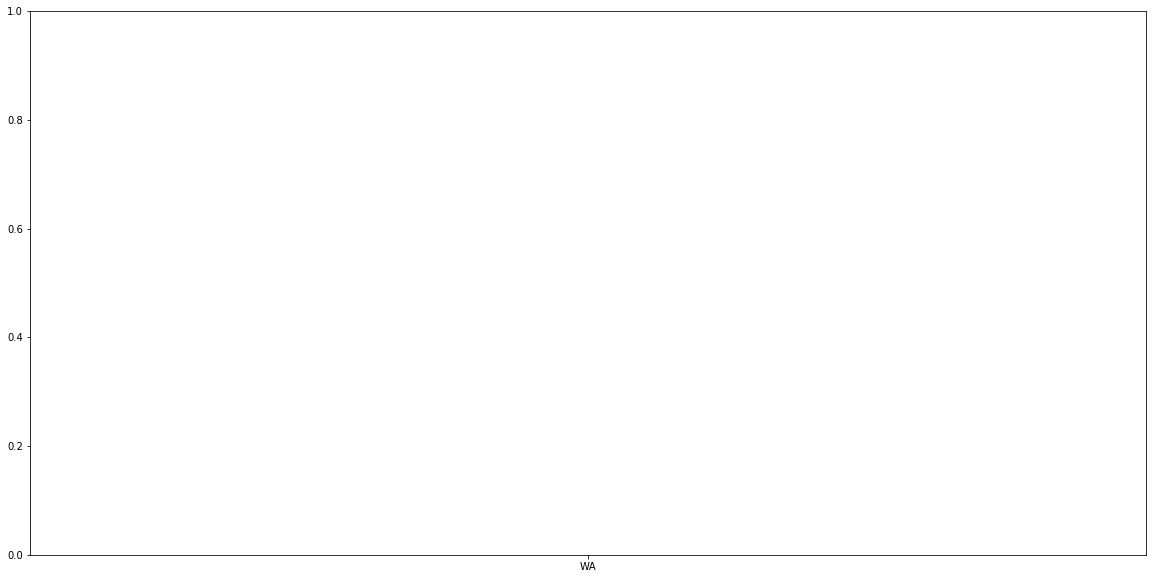

In [16]:
data.state.hist(figsize=(20,10))

In [13]:
shot_data = data[data["manner_of_death"]=="shot"]
heatmap_data = shot_data[['latitude', 'longitude']]
heatmap_data = heatmap_data.dropna()
heatmap_data.head()

,latitude,longitude
0,47.247,-123.122
1,45.487,-122.892
3,37.763,-122.422
4,40.384,-104.692
5,35.877,-97.423


In [14]:
shot_tazed_data = data[data["manner_of_death"]!="shot"]
heatmap_data2 = shot_tazed_data[['latitude', 'longitude']]
heatmap_data2 = heatmap_data2.dropna()
heatmap_data2.head()

,latitude,longitude
2,37.695,-97.281
10,37.930,-121.299
23,36.185,-115.116
38,37.588,-122.060
43,37.565,-82.921


In [15]:
gmaps.configure(api_key=) 


heatmap_layer = gmaps.symbol_layer(heatmap_data, fill_color="red", stroke_color="red", scale=2)
heatmap_layer2 = gmaps.symbol_layer(heatmap_data2, fill_color="green", stroke_color="green", scale=2)
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig.add_layer(heatmap_layer2)
fig

Figure(layout=FigureLayout(height='420px'))